In [1]:
#import needed libraries
import numpy as np #for numerical operations
import pandas as pd #for file operations
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns #also for plotting graphs
from sklearn.linear_model import LinearRegression #for machine learning 
from sklearn import metrics #for testing the machine learning model

In [2]:
# Importing the dataset
dataset = pd.read_csv('total-sunshine-duration-Japanweather1.csv')

In [3]:
dataset.head() #show the first 5 rows of the dataset

,year,total_precipitation,mean_air_temperature,mean_wind_speed,mean_relative_humidity,percentage_possible_sunshine,solar_radiation,total_sunshine_duration
0,Jan-10,75.5,-3.4,5.5,75,14,8.1,40.4
1,Feb-10,109.5,-4.9,4.1,74,17,9.1,48.8
2,Mar-10,100.5,-1.4,4.7,68,29,12.2,108.0
3,Apr-10,94.0,3.5,4.3,77,36,14.5,146.2
4,May-10,76.5,7.3,4.9,86,37,19.2,168.6


In [4]:
X = dataset.iloc[:, 1:-1].values #select All rows, all columns excluding the first and the last column
y = dataset.iloc[:, -1].values #select All rows, last column

#dates = X[:,0]
dates = dataset.iloc[:,0] #store the dates from the dataset (first column) in a variable, to be used when plotting graphs

In [5]:
#train a linear regression model on the data
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
#find the coefficient of determination to see how well the model performs
r_sq = model.score(X, y)
print('coefficient of determination: ', r_sq)

coefficient of determination:  0.9776840459436359


In [7]:
y_pred = model.predict(X) #using the trained model, try to predict outcomes
print('predicted response: ', y_pred, sep='\n') #display predictions

predicted response: 
[ 41.34123455  50.83749998 100.01869887 141.15444933 167.03802774
 197.68944408  90.94764935 181.83236851 202.89003372 165.54712127
  70.44902375  27.05758647  62.47997033 105.29248505 155.38453096
 150.94107508 138.21751327 124.09450029 141.22979849 176.21630916
 171.26261801 151.65693549  89.33192722  24.50461509  39.35124391
  77.00345871 134.73433779 190.38451042 139.30907158 192.15561701
 119.67031501 166.20909988 138.86888366 133.09998024  37.92782096
   3.53835995  36.7784067   74.60233825  95.1896103  163.44871969
 133.53612295 178.27175322 182.29309684 126.09882319 157.10654178
 143.26343344  75.20482816  26.70398425  41.21501783 115.40610936
 188.78172407 219.69887034 143.72116055 160.65890357 155.74880728
 167.17217163 162.50392316 154.18115711 111.63689528  14.5607054
  51.23707899 100.34809259 125.48441583 173.74100355 181.13716781
 123.83778771 127.81253865 135.08128866 177.55041552 126.89842348
  93.66096124  44.83923535   5.94903511  29.94992836 144

In [8]:
#model evauluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 6.8896092385326915
Mean Squared Error: 80.72659855841897
Root Mean Squared Error: 8.984798192414729


Text(0.5, 1.0, 'Total sunshine duration - actual and predicted values')

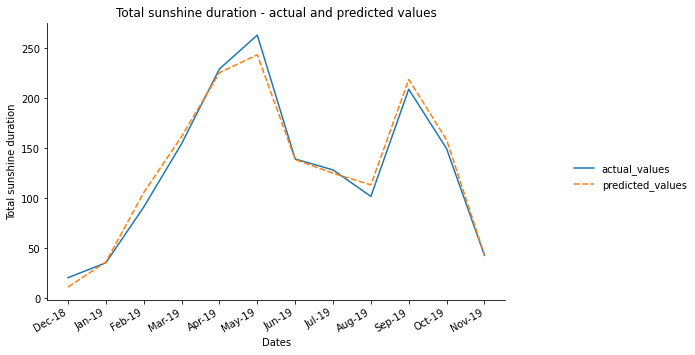

In [9]:
df = pd.DataFrame(dict(actual_values=y[-13:-1], predicted_values=y_pred[-13:-1]), index=dates[-13:-1]) #create a dataframe containing the last 12 actual and predicted values with the month and year as the index of the dataframe
g = sns.relplot(kind="line", data=df) #plot a line graph using the dataframe
g.fig.autofmt_xdate() #adjust the size of the x-axis so the dates have some spacing
g.fig.set_size_inches(10, 5) #set the size of the figure
plt.xlabel('Dates') #set the label for the x-axis
plt.ylabel('Total sunshine duration') #set the label for the y-axis
plt.title('Total sunshine duration - actual and predicted values') #set the title of the graph